In [23]:
import requests
import pyreadstat

# URL del archivo
url = 'https://hbiostat.org/data/repo/acath.dta'

# Función para descargar el archivo
def download_file(url, save_path):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(save_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

# Ruta local para guardar el archivo descargado
dta_file_path = 'acath.dta'

# Descargamos el archivo
download_file(url, dta_file_path)

# Leemos el archivo descargado
df, _ = pyreadstat.read_dta(dta_file_path)

# Guardamos como CSV al archivo resultante
csv_file_path = 'acath.csv'
df.to_csv(csv_file_path, index=False)

print(f"Archivo CSV guardado en: {csv_file_path}")

Archivo CSV guardado en: acath.csv


In [24]:
import pandas as pd

# Cargamos el conjunto de datos
ruta_archivo = "acath.csv" 
datos = pd.read_csv(ruta_archivo)

# Visualizamos las primeras filas del conjunto de datos
print("Primeros datos:")
print(datos.head())

# Resumen de datos faltantes
print("Datos faltantes por atributo:")
print(datos.isnull().sum())

# Proporción de datos faltantes
print("Proporción de datos faltantes por atributo:")
print(datos.isnull().mean())

# Imputamos valores faltantes con la media (por ser la única columna con faltante de datos y ser continua)
datos.fillna({'choleste': datos['choleste'].mean()}, inplace=True)

# Eliminamos la columna tvdlm
datos = datos.drop(columns=['tvdlm'])

# Verificamos el resultado
print("Datos faltantes por atributo luego de reemplazar y eliminar:")
print(datos.isnull().sum())

# Guardamos el conjunto de datos limpio en un nuevo archivo
datos.to_csv("acath_limpio.csv", index=False)

Primeros datos:
   sex  age  cad_dur  choleste  sigdz  tvdlm
0    0   73      132     268.0      1    1.0
1    0   68       85     120.0      1    1.0
2    0   54       45       NaN      1    0.0
3    1   58       86     245.0      0    0.0
4    1   56        7     269.0      0    0.0
Datos faltantes por atributo:
sex            0
age            0
cad_dur        0
choleste    1246
sigdz          0
tvdlm          3
dtype: int64
Proporción de datos faltantes por atributo:
sex         0.000000
age         0.000000
cad_dur     0.000000
choleste    0.355594
sigdz       0.000000
tvdlm       0.000856
dtype: float64
Datos faltantes por atributo luego de reemplazar y eliminar:
sex         0
age         0
cad_dur     0
choleste    0
sigdz       0
dtype: int64


1) el método de k-medias

In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


class Kmeans:
    def __init__(self, k_clusters, max_iter=300, tol=1e-4):
        self.k_clusters = k_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Inicializamos los centroides aleatoriamente
        np.random.seed(1)
        random_indices = np.random.permutation(X.shape[0])[:self.k_clusters]
        self.centroids = X[random_indices]
        
        for i in range(self.max_iter):
            # Asignamos puntos al centroide más cercano
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Recalculamos centroides
            new_centroids = (
                np.array([X[labels == j].mean(axis=0) 
                for j in range(self.k_clusters)])
            )
            
            # Verificamos convergencia
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids

        self.labels_ = labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Extraemos 'true_labels' y guardar como array numpy
true_labels = datos['sigdz'].to_numpy()

# Removemos la columna 'sigdz' y preparar los datos para el clustering
data_no_class = datos.drop(columns=['sigdz'], errors='ignore')

# Convertimos a matriz numpy para usar con nuestra clase
X = data_no_class.dropna().to_numpy()

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos k-medias con k=3
kmeans = Kmeans(k_clusters=3)
kmeans.fit(X_scaled)

# Resultados
cluster_labels = kmeans.labels_
print("Centroides:")
print(kmeans.centroids)
print("\nEjemplo de etiquetas de los primeros 15 registros con k=3:")
print(cluster_labels[:15])

# Guardamos etiquetas verdaderas para evaluación futura
print("\nTrue labels (primeros 15 registros):")
print(true_labels[:15])

# Aplicamos k-medias con k=5
kmeans5 = Kmeans(k_clusters=5)
kmeans5.fit(X_scaled)

# Resultados
cluster_labels5 = kmeans5.labels_
print("Centroides:")
print(kmeans5.centroids)
print("\nEjemplo de etiquetas de los primeros 15 registros con k=5:")
print(cluster_labels5[:15])

# Guardamos etiquetas verdaderas para evaluación futura
print("\nTrue labels (primeros 15 registros):")
print(true_labels[:15])

# Aplicamos k-medias con k=7
kmeans7 = Kmeans(k_clusters=7)
kmeans7.fit(X_scaled)

# Resultados
cluster_labels7 = kmeans7.labels_
print("Centroides:")
print(kmeans7.centroids)
print("\nEjemplo de etiquetas de los primeros 15 registros con k=7:")
print(cluster_labels7[:15])

# Guardamos etiquetas verdaderas para evaluación futura
print("\nTrue labels (primeros 15 registros):")
print(true_labels[:15])

# Aplicamos k-medias con k=2
kmeans2 = Kmeans(k_clusters=2)
kmeans2.fit(X_scaled)

# Resultados
cluster_labels2 = kmeans2.labels_
print("Centroides:")
print(kmeans2.centroids)
print("\nEjemplo de etiquetas de los primeros 15 registros con k=2:")
print(cluster_labels2[:15])

# Guardamos etiquetas verdaderas para evaluación futura
print("\nTrue labels (primeros 15 registros):")
print(true_labels[:15])

Centroides:
[[-0.67599161 -0.22454604 -0.36126193 -0.07158421]
 [ 1.4793083   0.07739729 -0.22297846  0.08567224]
 [-0.30252628  0.77761451  1.98814473  0.11851711]]

Ejemplo de etiquetas de los primeros 15 registros con k=3:
[2 2 0 1 1 0 2 0 0 0 0 0 1 0 0]

True labels (primeros 15 registros):
[1 1 1 0 0 1 1 1 1 1 1 0 0 1 1]
Centroides:
[[-0.42069413 -0.88151668 -0.32793596 -1.20835124]
 [-0.65546494 -0.82303711 -0.35911004  0.61399969]
 [-0.21123691  0.76072504  2.31347666  0.11465925]
 [ 1.4793083   0.18224572 -0.20461808  0.16355966]
 [-0.67599161  0.69422834 -0.24184892 -0.20635289]]

Ejemplo de etiquetas de los primeros 15 registros con k=5:
[2 4 4 3 3 4 4 1 4 4 1 1 3 4 4]

True labels (primeros 15 registros):
[1 1 1 0 0 1 1 1 1 1 1 0 0 1 1]
Centroides:
[[-0.5980892   0.72686901 -0.07214447 -1.3968727 ]
 [-0.67599161 -0.94357041 -0.32388631 -0.93562106]
 [-0.24366006  0.76267544  2.39549331  0.11262861]
 [ 1.4793083  -0.61015586 -0.31104055 -0.39967512]
 [-0.67599161  0.58997905 

2) el método de Agrupación jerárquica (en este punto puede usar una librería)

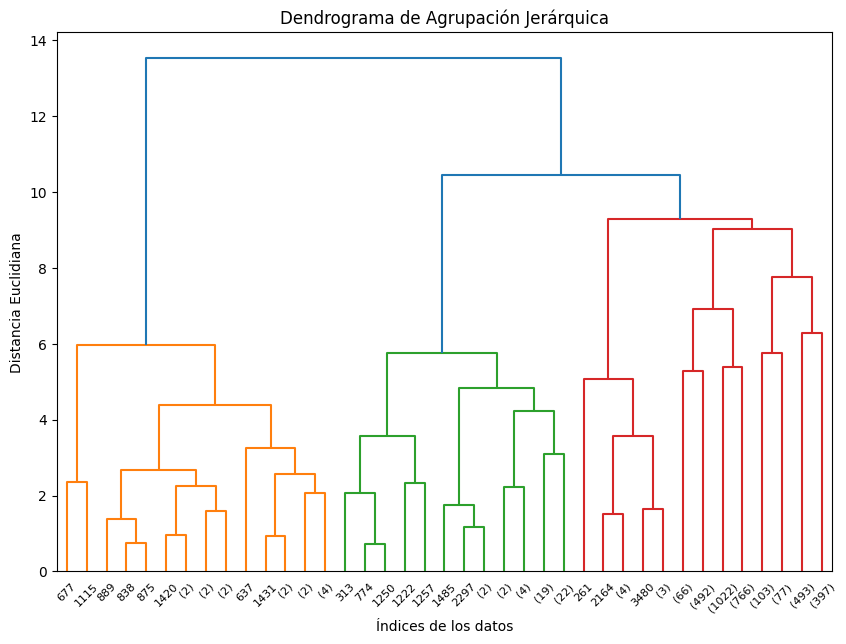

Etiquetas para los primeros 15 registros:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Calculamos las distancias y realizar el enlace jerárquico
linkage_matrix = linkage(X_scaled, method='complete', metric='euclidean')

# Visualizamos el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrograma de Agrupación Jerárquica")
plt.xlabel("Índices de los datos")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Dividimos en 3 clústeres
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Mostramos etiquetas de ejemplo
print("Etiquetas para los primeros 15 registros:")
print(hierarchical_labels[:15])

3) una red de Kohonen

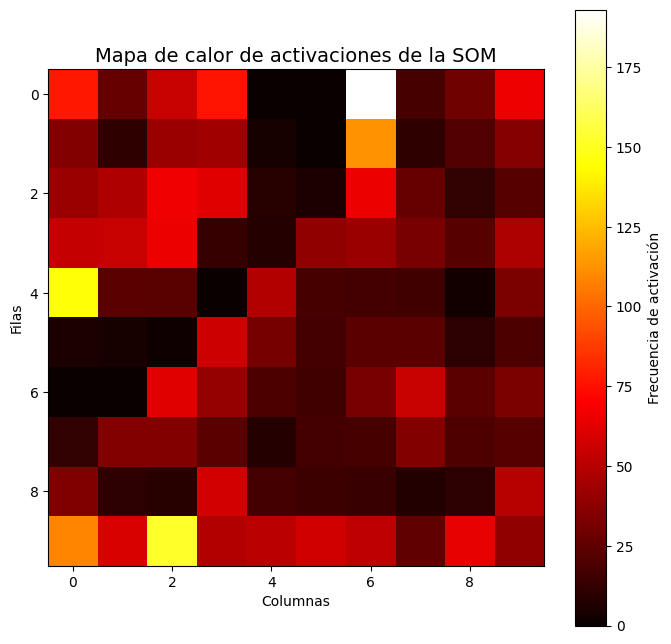

In [70]:
import numpy as np
import matplotlib.pyplot as plt

class KohonenSOM:
    def __init__(self, grid_size, input_dim, learning_rate=0.1, radius=None, max_iter=1000):
        self.grid_size = grid_size
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.radius = radius if radius else grid_size / 2
        self.max_iter = max_iter
        self.weights = np.random.rand(grid_size, grid_size, input_dim)

    def _find_bmu(self, x):
        distances = np.linalg.norm(self.weights - x, axis=2)
        return np.unravel_index(np.argmin(distances), (self.grid_size, self.grid_size))

    def _update_weights(self, x, bmu, iteration):
        lr = self.learning_rate * np.exp(-iteration / self.max_iter)
        radius = self.radius * np.exp(-iteration / self.max_iter)
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                dist_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                if dist_to_bmu <= radius:
                    influence = np.exp(-(dist_to_bmu ** 2) / (2 * (radius ** 2)))
                    self.weights[i, j] += lr * influence * (x - self.weights[i, j])

    def train(self, data):
        for iteration in range(self.max_iter):
            x = data[np.random.randint(0, data.shape[0])]  # Patrón aleatorio
            bmu = self._find_bmu(x)  # Encuentra el BMU
            self._update_weights(x, bmu, iteration)  # Actualiza pesos

    def predict(self, data):
        predictions = []
        for x in data:
            bmu = self._find_bmu(x)
            predictions.append(bmu)
        return predictions

# Prueba con los datos entandarizados (X_scaled)
som = KohonenSOM(grid_size=10, input_dim=X_scaled.shape[1], max_iter=500)
som.train(X_scaled)

# Nodos ganadores calculados
winning_nodes = som.predict(X_scaled)

# Creamos un mapa de calor de activaciones
activation_map = np.zeros((som.grid_size, som.grid_size))
for (row, col) in winning_nodes:
    activation_map[row, col] += 1  # Incrementamos el contador de activaciones en cada nodo

# Graficamos el mapa de calor
plt.figure(figsize=(8, 8))
plt.title("Mapa de calor de activaciones de la SOM", fontsize=14)
plt.imshow(activation_map, cmap="hot", interpolation="nearest")  # Usamos el colormap "hot"
plt.colorbar(label="Frecuencia de activación")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()

Utilidad de los métodos 

In [72]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score
from sklearn.preprocessing import LabelEncoder

def evaluar_agrupamiento(labels_reales, labels_predichos, datos):
    # Evalúa un método de agrupamiento comparando las etiquetas predichas con las reales.
    print("Resultados de evaluación:")
    print(f"Homogeneidad: {homogeneity_score(labels_reales, labels_predichos):.4f}")
    print(f"Completitud: {completeness_score(labels_reales, labels_predichos):.4f}")
    print(f"V-measure: {v_measure_score(labels_reales, labels_predichos):.4f}")
    print(f"ARI: {adjusted_rand_score(labels_reales, labels_predichos):.4f}")
    print(f"Silhouette Score: {silhouette_score(datos, labels_predichos):.4f}")
    print()

# Suponiendo que kmeans_labels contiene las etiquetas predichas
print("K-Means k=3:")
evaluar_agrupamiento(true_labels, cluster_labels, X_scaled)
# Suponiendo que kmeans_labels contiene las etiquetas predichas
print("K-Means k=5:")
evaluar_agrupamiento(true_labels, cluster_labels5, X_scaled)
# Suponiendo que kmeans_labels contiene las etiquetas predichas
print("K-Means k=7:")
evaluar_agrupamiento(true_labels, cluster_labels7, X_scaled)
# Suponiendo que kmeans_labels contiene las etiquetas predichas
print("K-Means k=2:")
evaluar_agrupamiento(true_labels, cluster_labels7, X_scaled)

# Suponiendo que hierarch_labels contiene las etiquetas predichas
print("Agrupación Jerárquica:")
evaluar_agrupamiento(true_labels, hierarchical_labels, X_scaled)

# Generar etiquetas basadas en nodos ganadores
print("Kohonen:")
winning_nodes = som.predict(X_scaled)  # Predicción para los primeros 10 registros

# Convertir los np.int64 a enteros y formatear la salida
formatted_nodes = [tuple(map(int, node)) for node in winning_nodes]

kohonen_labels = [formatted_nodes.index(node) for node in formatted_nodes]
evaluar_agrupamiento(true_labels, kohonen_labels, X_scaled)

# from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix
# import numpy as np

# def evaluate_clustering(true_labels, predicted_labels):
#     """
#     Evalúa el agrupamiento comparando las etiquetas reales con las etiquetas del agrupamiento.
#     """
#     # Precisión promedio por clúster
#     unique_clusters = np.unique(predicted_labels)
#     accuracies = []
#     for cluster in unique_clusters:
#         # Encuentra los índices de los elementos en este clúster
#         indices = np.where(predicted_labels == cluster)[0]
#         # Clase más frecuente en el clúster
#         majority_class = np.argmax(np.bincount(true_labels[indices]))
#         # Precisión en el clúster
#         accuracies.append(np.mean(true_labels[indices] == majority_class))
#     avg_accuracy = np.mean(accuracies)
    
#     # Índice de Rand ajustado
#     ari = adjusted_rand_score(true_labels, predicted_labels)
    
#     # Matriz de confusión
#     cm = confusion_matrix(true_labels, predicted_labels)
    
#     return avg_accuracy, ari, cm

# # # Ejemplo para cada método
# # # true_labels corresponde a la columna 'sigdz' original
# # true_labels = sigdz_column.values  # Reemplaza con tu vector de clase original

# # K-medias
# kmeans_predicted_labels = kmeans.predict(X)
# print(len(X))
# print(len(true_labels))
# print(len(kmeans_predicted_labels))
# kmeans_accuracy, kmeans_ari, kmeans_cm = evaluate_clustering(true_labels, kmeans_predicted_labels)

# # Agrupación jerárquica
# # Calcula el modelo jerárquico usando la métrica de Ward (que minimiza la varianza entre grupos)
# # Agrupación jerárquica
# hierarchical_model = linkage(X_scaled, method='ward')
# # cluster_labels_hierarchical = fcluster(hierarchical_model, t=3, criterion='maxclust')
# hierarchical_predicted_labels = hierarchical_model.labels_
# hierarchical_accuracy, hierarchical_ari, hierarchical_cm = evaluate_clustering(true_labels, hierarchical_predicted_labels)

# # Red de Kohonen
# kohonen_predicted_labels = np.array([node[0] * 10 + node[1] for node in som.predict(X)])  # Etiquetas únicas basadas en coordenadas
# kohonen_accuracy, kohonen_ari, kohonen_cm = evaluate_clustering(true_labels, kohonen_predicted_labels)

K-Means k=3:
Resultados de evaluación:
Homogeneidad: 0.0889
Completitud: 0.0596
V-measure: 0.0714
ARI: 0.0959
Silhouette Score: 0.3527

K-Means k=5:
Resultados de evaluación:
Homogeneidad: 0.1115
Completitud: 0.0460
V-measure: 0.0652
ARI: 0.0529
Silhouette Score: 0.2774

K-Means k=7:
Resultados de evaluación:
Homogeneidad: 0.1417
Completitud: 0.0481
V-measure: 0.0718
ARI: 0.0541
Silhouette Score: 0.2494

K-Means k=2:
Resultados de evaluación:
Homogeneidad: 0.1417
Completitud: 0.0481
V-measure: 0.0718
ARI: 0.0541
Silhouette Score: 0.2494

Agrupación Jerárquica:
Resultados de evaluación:
Homogeneidad: 0.0023
Completitud: 0.0121
V-measure: 0.0038
ARI: -0.0089
Silhouette Score: 0.4510

Kohonen:
Resultados de evaluación:
Homogeneidad: 0.1987
Completitud: 0.0298
V-measure: 0.0519
ARI: 0.0060
Silhouette Score: 0.0596



In [66]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes los datos cargados en la variable "datos"
# true_labels es la columna "sigdz"
true_labels = datos['sigdz'].to_numpy()

# Preparamos los datos, eliminando la columna "sigdz"
data_no_class = datos.drop(columns=['sigdz'], errors='ignore')
X = data_no_class.dropna().to_numpy()

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para realizar clustering y calcular métricas
def kmeans_analysis(X, true_labels, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
    kmeans.fit(X)
    labels = kmeans.labels_
    
    # Calculamos métricas
    homogeneity = homogeneity_score(true_labels, labels)
    completeness = completeness_score(true_labels, labels)
    v_measure = v_measure_score(true_labels, labels)
    ari = adjusted_rand_score(true_labels, labels)
    silhouette = silhouette_score(X, labels)
    
    print(f"\nResultados para K-Means con k={k}:")
    print(f"Homogeneidad: {homogeneity:.4f}")
    print(f"Completitud: {completeness:.4f}")
    print(f"V-measure: {v_measure:.4f}")
    print(f"ARI: {ari:.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")
    
    return kmeans, labels

# Probar con diferentes valores de k
k_values = [2, 3, 5, 7]
results = {}

for k in k_values:
    model, cluster_labels = kmeans_analysis(X_scaled, true_labels, k)
    results[k] = {"model": model, "labels": cluster_labels}

# Ejemplo de acceso a los centroides de un modelo en k=3
print("\nCentroides para k=3:")
print(results[3]["model"].cluster_centers_)



Resultados para K-Means con k=2:
Homogeneidad: 0.0107
Completitud: 0.0140
V-measure: 0.0121
ARI: -0.0290
Silhouette Score: 0.2850

Resultados para K-Means con k=3:
Homogeneidad: 0.0888
Completitud: 0.0596
V-measure: 0.0713
ARI: 0.0966
Silhouette Score: 0.3529

Resultados para K-Means con k=5:
Homogeneidad: 0.1194
Completitud: 0.0506
V-measure: 0.0711
ARI: 0.0506
Silhouette Score: 0.3031

Resultados para K-Means con k=7:
Homogeneidad: 0.1349
Completitud: 0.0464
V-measure: 0.0690
ARI: 0.0484
Silhouette Score: 0.2921

Centroides para k=3:
[[-0.67599161 -0.2222541  -0.3594334  -0.07112226]
 [-0.29938131  0.77634076  2.00018009  0.11816024]
 [ 1.4793083   0.07739729 -0.22297846  0.08567224]]


Visualizar los clústers:

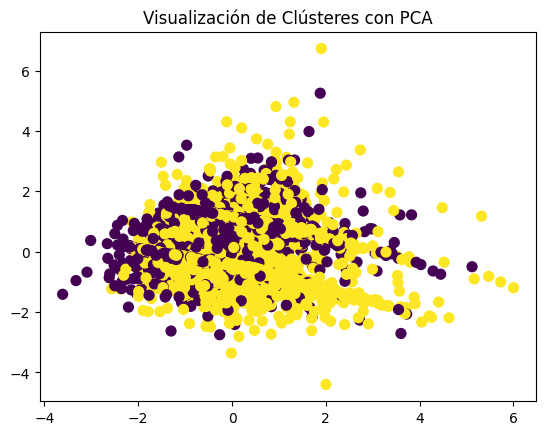

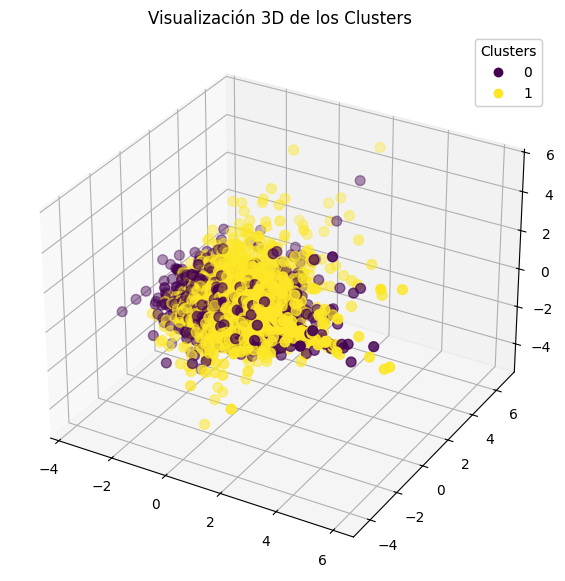

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels, cmap='viridis', s=50)
plt.title("Visualización de Clústeres con PCA")
plt.show()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reducir a 3 dimensiones con PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los datos en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=true_labels
                     , cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.title("Visualización 3D de los Clusters")
plt.show()